In [90]:
%run ./kalman_filter/Kalman_Filter.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# LOADING DATASET

In [80]:
df = pd.read_csv('./datasets/AMZN.csv')
closing_values = df['Adj Close']

In [82]:
closing_values.head()

0    129.179993
1    129.039993
2    127.900002
3    130.360001
4    130.220001
Name: Adj Close, dtype: float64

# APPLYING THE FILTER

In [46]:
initial_state = np.array([closing_values[0], 0, 0]) 
state_covariance = np.eye(3)
dt = 1

transition_matrix = np.array([
    [1, dt, 0.5 * (dt**2)],
    [0,1,dt],
    [0,0,1]
])

observation_matrix = np.array([[1,0,0]])
q = 0.1 #in the article this is the variance of the acceleration
process_noise = q * np.array([
    [dt**4 / 4, dt**3 / 2, dt**2 / 2],
    [dt**3 / 2, dt**2, dt],
    [dt**2 / 2, dt, 1]
])

measurement_noise = np.array([[1]])  

In [47]:
KalmanFilter = KalmanFilter(initial_state, state_covariance, transition_matrix, observation_matrix, process_noise, measurement_noise)

In [48]:
predicted_prices = []
predicted_velocities = []
predicted_accelerations = []

for price in closing_values:
    KalmanFilter.predict()
    KalmanFilter.update(np.array([price]))
    predicted_prices.append(KalmanFilter.state[0])
    predicted_velocities.append(KalmanFilter.state[1])
    predicted_accelerations.append(KalmanFilter.state[2])

# RESULTS 

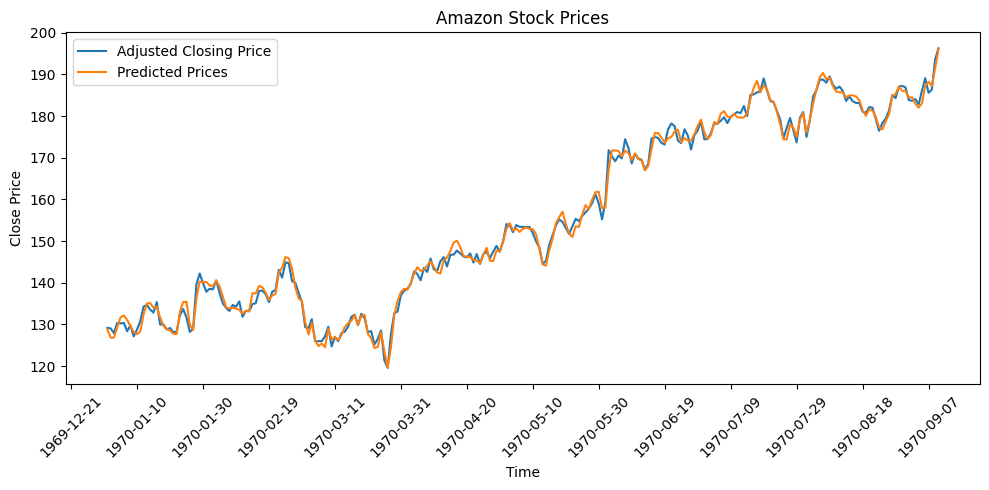

In [93]:
#plotting stock prices original time series againts predicted

plt.figure(figsize=(10, 5))
plt.plot(df.Date, df['Adj Close'], label='Adjusted Closing Price')
plt.plot(df.Date, predicted_prices, label = 'Predicted Prices')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.legend()
plt.xticks(rotation=45)
plt.title('Amazon Stock Prices')
plt.ylabel('Close Price')
plt.xlabel('Time')
plt.tight_layout()

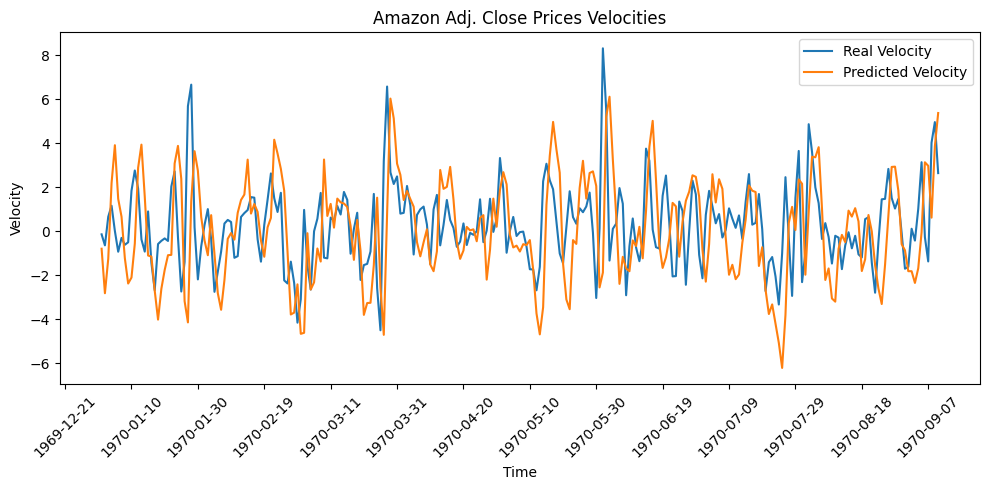

In [100]:
# plotting real vs predicted velocities
plt.figure(figsize=(10, 5))
plt.plot(df.Date, np.gradient(closing_values), label='Real Velocity')
plt.plot(df.Date, predicted_velocities, label='Predicted Velocity')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.xticks(rotation=45)
plt.legend()
plt.title('Amazon Adj. Close Prices Velocities')
plt.tight_layout()

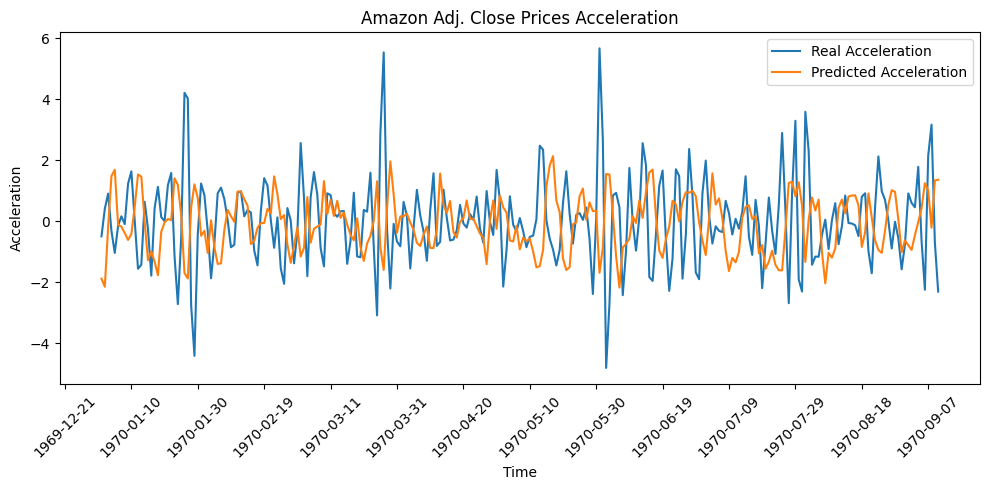

In [102]:
# plotting real vs predicted velocities

plt.figure(figsize=(10, 5))
plt.plot(df.Date, np.gradient(np.gradient(closing_values)), label='Real Acceleration')
plt.plot(df.Date, predicted_accelerations, label='Predicted Acceleration')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.xticks(rotation=45)
plt.title('Amazon Adj. Close Prices Acceleration')
plt.tight_layout()